In [1]:
# solver.solve()
%run ~/init.py
%matplotlib inline
import caffe
caffe.set_device(0)
caffe.set_mode_gpu()

In [2]:
%who
sys.path

caffe	 caffe_root	 cv	 cv2	 np	 old_path	 os	 osp	 pd	 
plt	 scipy	 sys	 


['',
 '/usr/lib/python2.7/dist-packages',
 '/usr/local/lib/python2.7/dist-packages/zjujwbtools-0.1-py2.7.egg',
 '/home/luzai/App/caffe/distribute/python',
 '/home/luzai/App/caffe/python',
 '/home/luzai/Desktop/mCaffe',
 '/usr/lib/python2.7',
 '/usr/lib/python2.7/plat-x86_64-linux-gnu',
 '/usr/lib/python2.7/lib-tk',
 '/usr/lib/python2.7/lib-old',
 '/usr/lib/python2.7/lib-dynload',
 '/home/luzai/.local/lib/python2.7/site-packages',
 '/usr/local/lib/python2.7/dist-packages',
 '/usr/lib/python2.7/dist-packages/PILcompat',
 '/usr/lib/python2.7/dist-packages/gtk-2.0',
 '/usr/local/lib/python2.7/dist-packages/IPython/extensions',
 '/home/luzai/.ipython']

(3, 32, 32)


TypeError: Invalid dimensions for image data

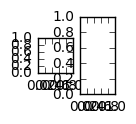

In [28]:
import cv2
solver=None
solver=caffe.get_solver('cifar/cifar10_quick_solver.prototxt')
solver.net.forward()
img = solver.net.blobs['data'].data[99]
img_bp=img.copy()

img=img_bp.copy()

print img.shape
# img=img[::-1]
# bgr=cv2.split(img)
# img=cv2.merge((bgr[2],bgr[1],bgr[0]))
img = img.transpose(2,0,1)
# from pylab import *
# figure(figsize=(1,1))
# imshow(g)
# grid("off")
# axis("off")
# colorbar()
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(1,1))
ax1.imshow(img)
ax1.axis("off")

blob = caffe.proto.caffe_pb2.BlobProto()
data = open('./cifar/mean.binaryproto', 'rb').read()
blob.ParseFromString(data)
arr = np.array(caffe.io.blobproto_to_array(blob))
out = arr[0]
out = out.transpose(2,0,1)
print out.shape

ax2.imshow(img+out, cmap = 'gray')
ax2.axis("off")
# colorbar()
# cv2.imshow('ccc',img+out)
# cv2.waitKey()
# cv2.destroyAllWindows()
# img2=plt.imread('/home/luzai/Desktop/noisy_label/external/exp/db/cifar10/train_images/00099.jpg')
img2=plt.imread('/home/luzai/Desktop/00099.jpg')
plt.figure(figsize=(1,1))
plt.imshow(img2)
plt.axis("off")



In [9]:
cv2.split?


(3, 32, 32)

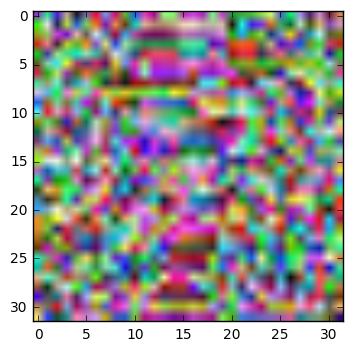

In [25]:
plt.imshow(bgr)
bgr[31].shape
img_bp.shape


The figure above is
```
    img(caffe data layer input) ,img1(img + out), where `out` is `mean img`
    img2(origin image)
```
The data below is 
```
    first line:img2-img
    second line：mean img
```

In [4]:
from pylab import *
# r=ones([233,233])*255
# g=zeros([233,233])
# b=g
# imshow(cv2.merge((r,g,b)))
# cv2.imshow('ccc',cv2.merge((r,g,b)))
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# blob = caffe.proto.caffe_pb2.BlobProto()
# data = open('/home/luzai/Desktop/cifar10_mean.binaryproto', 'rb').read()
# blob.ParseFromString(data)
# arr = np.array(caffe.io.blobproto_to_array(blob))
# out = arr[0]
# out=out.transpose(1,2,0)
# out.mean(0).mean(0)
img3=img+out
for i in range(10):
#     print img3[i][i], img2[i][i]
    print img2[i][i]- img[i][i]
    print out[i][i],'\n'

[ 115.71073914  133.05613708  126.55380249]
[ 130.71073914  136.05613708  132.55380249] 

[ 126.34460449  143.45913696  142.46560669]
[ 129.34460449  134.45913696  130.46560669] 

[ 123.47348022  132.0554657   126.4758606 ]
[ 129.47348022  134.0554657   129.4758606 ] 

[ 132.50613403  139.43788147  133.22288513]
[ 129.50613403  133.43788147  128.22288513] 

[ 122.27531433  126.35908508  115.58769989]
[ 129.27531433  132.35908508  126.58769989] 

[ 140.03523254  142.14767456  123.99014282]
[ 129.03523254  131.14767456  124.99014282] 

[ 119.6864624   117.69773865  127.10868073]
[ 128.6864624   129.69773865  123.10868073] 

[ 125.15948486  122.01094055  122.12097931]
[ 128.15948486  128.01094055  121.12097931] 

[ 127.71134186  127.30814362  130.09347534]
[ 127.71134186  126.30814362  119.09348297] 

[ 126.75621796  124.97219849  124.38031769]
[ 127.75621796  124.97219849  117.38031769] 

